<a href="https://colab.research.google.com/github/mikolaj553/Machine-Learning-Homeworks-Repo/blob/main/ml_hw6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework #6 - Mikołaj Kowalewski, lab group no. 1

We will first dicuss the three common formulations to the splitting criterion in CART for regression problems: Local RSS minimization, RSS gain maximization, and total RSS minimization. We will also determine whether these criteria are equivalent or can yield different split choices.


## Setup and Notation

- We have a dataset with features $X$ and target $y$.  
- We want to choose a feature $X_j$ and a threshold $t$ to split the data into two regions:
$$
R_1(X_j, t) \quad \text{and} \quad R_2(X_j, t).
$$
- Let $\bar{y}_m$ denote the mean of targets $y_i$ within region $R_m$.

---

## 1. Local RSS Minimization

Local RSS (Residual Sum of Squares) Minimization chooses the feature and threshold that minimize the sum of squared errors in the two child nodes. Formally:

$$
(X^*, t^*) = \arg \min_{(X_j, t)} \Biggl(
  \sum_{x_i \in R_1(X_j, t)} (y_i - \bar{y}_1)^2
  \;+\;
  \sum_{x_i \in R_2(X_j, t)} (y_i - \bar{y}_2)^2
\Biggr).
$$

- $\bar{y}_1$ is the mean of $\{\,y_i : x_i \in R_1(X_j, t)\}$.
- $\bar{y}_2$ is the mean of $\{\,y_i : x_i \in R_2(X_j, t)\}$.

This criterion can be considered local because it only focuses on reducing the residual sum of squares at the current split.

---
# 2. RSS Gain Maximization

In this method, we evaluate splits by computing the reduction in RSS when a parent node is split into two child nodes. The basic idea is that a good split should decrease the variability in the target values in the resulting children compared to that in the parent node.

We start by defining the RSS  of the parent node:
$$
\text{Parent RSS} = \sum_{x_i \in R_{\text{parent}}} (y_i - \bar{y})^2,
$$
where $\bar{y}$ is the mean target value for all observations in the parent node $R_{\text{parent}}$.

After performing a split on feature $X_j$ at threshold $t$, the data is partitioned into two child regions $R_1(X_j, t)$ and $R_2(X_j, t)$ with means $\bar{y}_1$ and $\bar{y}_2$, respectively. The **RSS** for the two child nodes is:
$$
\text{Children RSS} = \sum_{x_i \in R_1(X_j, t)} (y_i - \bar{y}_1)^2
\;+\;
\sum_{x_i \in R_2(X_j, t)} (y_i - \bar{y}_2)^2.
$$

The **RSS gain** achieved by the split is then given by the difference between the parent and the combined children RSS:
$$
\text{RSS Gain} = \sum_{x_i \in R_{\text{parent}}} (y_i - \bar{y})^2
\;-\;
\left(
\sum_{x_i \in R_1(X_j, t)} (y_i - \bar{y}_1)^2
\;+\;
\sum_{x_i \in R_2(X_j, t)} (y_i - \bar{y}_2)^2
\right).
$$

We choose the split $(X^*, t^*)$ that maximizes this RSS gain:
$$
(X^*, t^*) = \arg \max_{X_j,\,t} \Biggl[
\sum_{x_i \in R_{\text{parent}}} (y_i - \bar{y})^2
\;-\;
\sum_{m=1,2}\sum_{x_i \in R_m(X_j, t)} (y_i - \bar{y}_m)^2
\Biggr].
$$


---

## Proof of Equivalence of RSS Gain Maximization to Local RSS Minimization

Notice that in the local RSS minimization method, we directly look to minimize the sum of the RSS in the two child nodes:
$$
(X^*, t^*) = \arg \min_{X_j,\,t} \left[
\sum_{x_i \in R_1(X_j, t)} (y_i - \bar{y}_1)^2
\;+\;
\sum_{x_i \in R_2(X_j, t)} (y_i - \bar{y}_2)^2
\right].
$$

Since the parent RSS,
$$
\sum_{x_i \in R_{\text{parent}}} (y_i - \bar{y})^2,
$$
remains constant for a given node regardless of the split, maximizing the RSS gain is equivalent to minimizing the sum of the children's RSS. To see this formally, define
$$
f(X_j, t) = \sum_{x_i \in R_1(X_j, t)} (y_i - \bar{y}_1)^2 + \sum_{x_i \in R_2(X_j, t)} (y_i - \bar{y}_2)^2,
$$
and note that the RSS gain for a split $(X_j,t)$ can be written as
$$
G(X_j, t) = \sum_{x_i \in R_{\text{parent}}} (y_i - \bar{y})^2 - f(X_j, t).
$$
Since $\sum_{x_i \in R_{\text{parent}}} (y_i - \bar{y})^2$ is a constant (say, $C$) for the parent node, we have
$$
G(X_j, t) = C - f(X_j, t).
$$
Thus, if a split $(X_j^*,t^*)$ minimizes $f(X_j,t)$, then for any other split we have
$$
f(X_j^*,t^*) \leq f(X_j,t) \quad \Longrightarrow \quad C - f(X_j^*,t^*) \geq C - f(X_j,t),
$$
which means
$$
G(X_j^*,t^*) \geq G(X_j,t).
$$
Conversely, if $(X_j^*,t^*)$ maximizes $G(X_j,t)$, then
$$
G(X_j^*,t^*) \geq G(X_j,t) \quad \Longrightarrow \quad f(X_j^*,t^*) \leq f(X_j,t).
$$

Therefore, we have shown the following equivalence:
$$
\arg \max_{X_j,\,t} \left[
\text{Parent RSS} - \text{Children RSS}
\right]
\quad = \quad
\arg \min_{X_j,\,t} \left[
\text{Children RSS}
\right].
$$

This demonstrates that these two approaches: RSS Gain Maximization and Local RSS Minimization are equivalent in the context of choosing the optimal split at a node.

---
# 3. Total RSS minimization

For a dataset $\{(x_i, y_i)\}_{i=1}^N$ with features $X$ and target $y$, let $T$ be the regression tree. We continue splitting nodes in a recursive manner until we obtain a final partition of the feature space into disjoint leaf regions $\{R_m\}$.  For each leaf $m$, let $\bar{y}_m$ be the mean response in $R_m$:
$$
\bar{y}_m = \frac{1}{|R_m|} \sum_{x_i \in R_m} y_i.
$$

We then define
$$
\text{Leaves}(T(X_j, t))
= \{\, m \,\mid\, x_i \in R_m \,\text{for each leaf }R_m\text{ of }T\}.
$$

The objective of **minimizing total Residual Sum of Squares (total RSS)** is stated as:
$$
\bigl(X^*, t^*\bigr)
=
\arg \min_{(X_j, t)}
\sum_{m \in \text{Leaves}\bigl(T(X_j,t)\bigr)}
\sum_{x_i \in R_m}
\bigl(y_i - \bar{y}_m\bigr)^2.
$$

Here the notation $T(X_j, t)$ indicates the entire tree obtained by using the split $(X_j, t)$ at the current node and then continuing to grow the tree (using splits chosen by some procedure) until termination. We will now show that this global approach is not equivalent to the first two approaches.


# Counterexample: Global (Total) RSS Minimization Is Not Equivalent to Local RSS Minimization / RSS Gain Maximization

The following counterexample demonstrates that the split chosen by local methods (i.e. minimizing the immediate sum of squared errors in the child nodes or maximizing RSS gain) does not necessarily lead to the same result as the Total RSS Minimization.

We use the following notation throughout:
- A candidate split is denoted by $(X, t)$.
- The two resulting regions from a split are denoted by $$R_1(X, t)$$ and $$R_2(X, t)$$.
- The mean of responses in a region $R_m$ is denoted by $\bar{y}_{R_m}$.
- The local RSS in a region is given by $$\sum_{x_i \in R_m(X, t)} (y_i - \bar{y}_{R_m})^2.$$
- The overall (parent) RSS is  
$$
RSS_{\text{parent}} = \sum_{x_i \in R_{\text{parent}}} (y_i - \bar{y}_{\text{parent}})^2.
$$

We now consider a dataset with a single feature $X$ and 6 observations:

| Obs. | $x_i$ | $y_i$ |
|------|-------|-------|
| 1    | 1     | 0     |
| 2    | 2     | 5     |
| 3    | 3     | 15    |
| 4    | 4     | 15    |
| 5    | 5     | 5     |
| 6    | 6     | 0     |

---

## Step 1. Parent Node Computation

- **Parent Mean:**  
$$
\bar{y}_{\text{parent}} = \frac{0 + 5 + 15 + 15 + 5 + 0}{6} = \frac{40}{6} \approx 6.67.
$$

- **Parent RSS:**  
$$
\begin{aligned}
RSS_{\text{parent}} &= (0-6.67)^2 + (5-6.67)^2 + (15-6.67)^2 \\
&\quad +\ (15-6.67)^2 + (5-6.67)^2 + (0-6.67)^2 \\
&\approx 44.45 + 2.78 + 69.44 + 69.44 + 2.78 + 44.45 \\
&= 233.34.
\end{aligned}
$$

---

## Step 2. Local RSS Minimization (Approaches 1 & 2)

We evaluate two candidate splits. Candidate thresholds are derived as midpoints between adjacent sorted $x$ values. Here, the sorted $x$ values are: $$1,\,2,\,3,\,4,\,5,\,6.$$  
Thus, one candidate is $$t = \frac{1+2}{2} = 1.5,$$ and another is $$t = \frac{2+3}{2} = 2.5.$$

### Candidate A: Split at $t = 1.5$

- **Left Region, $$R_1(1.5)$$**  
  Contains all points with $x_i \le 1.5$
  $\{(1,0)\}$.  
  - Mean:  
    $$
    \bar{y}_{R_1} = 0.
    $$
  - RSS:  
    $$
    RSS(R_1) = (0 - 0)^2 = 0.
    $$

- **Right Region, $$R_2(1.5)$$**  
  Contains all points with $x_i > 1.5$:  
  $\{(2,5),\, (3,15),\, (4,15),\, (5,5),\, (6,0)\}$.  
  - Mean:  
    $$
    \bar{y}_{R_2} = \frac{5+15+15+5+0}{5} = 8.
    $$
  - RSS:  
  
    \begin{aligned}
    RSS(R_2) &= (5-8)^2 + (15-8)^2 + (15-8)^2 + (5-8)^2 + (0-8)^2 \\
    &= 3^2 + 7^2 + 7^2 + 3^2 + 8^2 \\
    &= 9 + 49 + 49 + 9 + 64 \\
    &= 180.
    \end{aligned}
  

- **Total RSS for Candidate A:**  
$$
RSS_{t=1.5} = RSS(R_1(1.5)) + RSS(R_2(1.5)) = 0 + 180 = 180.
$$

- **RSS Gain for Candidate A:**  
$$
\Delta RSS = RSS_{\text{parent}} - RSS_{t=1.5} = 233.34 - 180 = 53.34.
$$

### Candidate B: Split at $t = 2.5$

- **Left Region, $$R_1'(2.5)$$**  
  Contains points with $x_i \le 2.5$:  
  $\{(1,0),\, (2,5)\}$.  
  - Mean:  
    $$
    \bar{y}_{R_1'} = \frac{0+5}{2} = 2.5.
    $$
  - RSS:  
    $$
    RSS(R_1') = (0-2.5)^2 + (5-2.5)^2 = 6.25 + 6.25 = 12.5.
    $$

- **Right Region, $$R_2'(2.5)$$**  
  Contains points with $x_i > 2.5$:  
  $\{(3,15),\, (4,15),\, (5,5),\, (6,0)\}$.  
  - Mean:  
    $$
    \bar{y}_{R_2'} = \frac{15+15+5+0}{4} = \frac{35}{4} = 8.75.
    $$
  - RSS:  
    
    \begin{aligned}
    RSS(R_2') &= (15-8.75)^2 + (15-8.75)^2 + (5-8.75)^2 + (0-8.75)^2 \\
    &= (6.25)^2 + (6.25)^2 + (-3.75)^2 + (-8.75)^2 \\
    &= 39.06 + 39.06 + 14.06 + 76.56 \\
    &\approx 168.74.
    \end{aligned}
    

- **Total RSS for Candidate B:**  
$$
RSS_{t=2.5} = RSS(R_1'(2.5)) + RSS(R_2'(2.5)) = 12.5 + 168.74 = 181.24.
$$

- **RSS Gain for Candidate B:**  
$$
\Delta RSS = RSS_{\text{parent}} - RSS_{t=2.5} = 233.34 - 181.24 = 52.10.
$$

**Local Decision:**  
Since $$RSS_{t=1.5} = 180$$ is lower than $$RSS_{t=2.5} = 181.24,$$ the local methods (Approaches 1 & 2) select the split at $$t = 1.5$$ because it yields a higher immediate gain (53.34 vs. 52.10).

---

## Step 3. Total RSS Minimization (Approach 3)

Next, we consider two-level trees by allowing a second split in the child nodes, and compare the overall total RSS.

We choose a candidate split within $R_2(1.5)$ that minimizes its RSS further. Consider splitting $R_2(1.5)$ at $t = 4.5$ (i.e., between $x=4$ and $x=5$).

- **Left in** $R_2(1.5)$, denoted $R_{21}$  
  Contains points $\{(2,5), (3,15), (4,15)\}.$  
  - **Mean:**


 $$
\bar{y}_{R_{21}} = \frac{5 + 15 + 15}{3} = \frac{35}{3} \approx 11.67
$$

    

  - **RSS:**

  $$
RSS(R_{21})
= (5 - 11.67)^2 + (15 - 11.67)^2 + (15 - 11.67)^2
= (6.67)^2 + (3.33)^2 + (3.33)^2
\approx 44.45 + 11.11 + 11.11
= 66.67
$$



- **Right in** $R_2(1.5)$, denoted $R_{22}$  
  Contains points $\{(5,5), (6,0)\}.$  
  - **Mean:**

 $$
\bar{y}_{R_{22}} = \frac{5 + 0}{2} = 2.5
$$

  - **RSS:**

    $$
    RSS(R_{22})
    = (5 - 2.5)^2 + (0 - 2.5)^2
    = 6.25 + 6.25
    = 12.5
    $$

- **Total RSS for** $R_2(1.5)$ **after split:**

  $$
  RSS_{R_2}^{\text{split}}
  = RSS(R_{21}) + RSS(R_{22})
  = 66.67 + 12.5
  = 79.17
  $$

**3. Total RSS for Tree A:**

$$
RSS_{\text{Tree A}}
= RSS(R_1(1.5)) + RSS_{R_2}^{\text{split}}
= 0 + 79.17
= 79.17
$$

---

### Tree B: Lookahead Tree (Initial Split at $t = 2.5$)

1. **First Split** at $t = 2.5$  
   - **Left leaf**: $R_1'(2.5) = \{(1,0), (2,5)\}$ with $RSS = 12.5$  
   - **Right node**: $R_2'(2.5) = \{(3,15), (4,15), (5,5), (6,0)\}$ with $RSS = 168.74$

2. **Second Split** on $R_2'(2.5)$. Again, choose to split $R_2'(2.5)$ at $t = 4.5$:

   - **Left in** $R_2'(2.5)$, denoted $R_{21}'$  
     Contains points $\{(3,15), (4,15)\}.$  
     - **Mean:**

$$
\bar{y}_{R_{21}'} = \frac{15 + 15}{2} = 15
$$


- **RSS:**

$$
RSS(R_{21}')
= (15 - 15)^2 + (15 - 15)^2
= 0 + 0
= 0
$$

   - **Right in** $R_2'(2.5)$, denoted $R_{22}'$  
     Contains points $\{(5,5), (6,0)\}.$  
     - **Mean:**

$$
\bar{y}_{R_{22}'} = \frac{5 + 0}{2} = 2.5
$$

- **RSS:**

$$
RSS(R_{22}')
= (5 - 2.5)^2 + (0 - 2.5)^2
= 6.25 + 6.25
= 12.5
$$

   - **Total RSS for** $R_2'(2.5)$ **after split:**

     $$
     RSS_{R_2'}^{\text{split}}
     = RSS(R_{21}') + RSS(R_{22}')
     = 0 + 12.5
     = 12.5
     $$

3. **Total RSS for Tree B:**

$$
RSS_{\text{Tree B}}
= RSS(R_1'(2.5)) + RSS_{R_2'}^{\text{split}}
= 12.5 + 12.5
= 25.0
$$

---

## Comparison and Conclusion

- The greedy local methods pick the split at $t = 1.5$ because it yields a lower immediate total RSS:
  $$
  RSS_{t=1.5} = 180 \quad \text{(immediate gain } 53.34\text{).}
  $$
  With an optimal second-level split, **Tree A** has:
  $$
  RSS_{\text{Tree A}} = 79.17
  $$

- However, the total RSS minimization approach shows that if we instead choose $t = 2.5$ and then split its right node optimally, we obtain Tree B with a much lower overall RSS:
  $$
  RSS_{\text{Tree B}} = 25.0
  $$

Thus, although the local method selects $t = 1.5$, the global optimal two-level tree results from first splitting at $t = 2.5.$ This demonstrates that total RSS minimization is not equivalent to the other approaches.

Now we will conduct a Python experiment to see which of the formulations of the splitting criteria scikit-learn uses. We will utilize the same dataset as in the counterexample above.



=== scikit-learn DecisionTree (max_depth=2) ===
Number of nodes: 5
Root threshold: 1.500
Left child threshold: -2.0
Right child threshold: 4.5
Final RSS (scikit-learn): 79.17

=== Manual Two-Level Partitions ===
First split at 1.5 => final RSS: 79.17
First split at 2.5 => final RSS: 12.50
First split at 3.5 => final RSS: 25.00
First split at 4.5 => final RSS: 12.50
First split at 5.5 => final RSS: 79.17



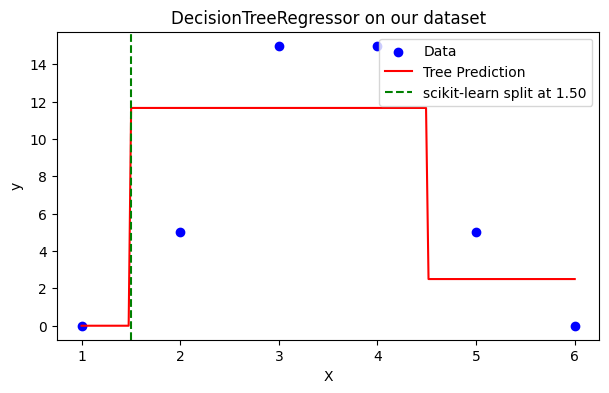

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

def compute_rss(y_vals):
    """
    Computing the sum of squared deviations from the mean for a set of y-values.
    """
    if len(y_vals) == 0:
        return 0.0
    mean_y = np.mean(y_vals)
    return np.sum((y_vals - mean_y)**2)

def best_node_split_rss(X_node, y_node):
    """
    Given data in a node (X_node, y_node), find the threshold (midpoint) that yields
    the minimal sum of child RSS in a second-level split. Returns that minimal RSS.
    """
    if len(X_node) <= 1:
        return compute_rss(y_node)

    x_sorted = np.unique(np.sort(X_node.ravel()))
    if len(x_sorted) == 1:
        return compute_rss(y_node)

    best_rss = float('inf')
    for i in range(len(x_sorted) - 1):
        t_candidate = 0.5 * (x_sorted[i] + x_sorted[i+1])
        left_mask = (X_node.ravel() <= t_candidate)
        rss_left = compute_rss(y_node[left_mask])
        rss_right = compute_rss(y_node[~left_mask])
        total_rss = rss_left + rss_right
        if total_rss < best_rss:
            best_rss = total_rss
    return best_rss

def manual_two_level_rss(X, y, first_threshold):
    """
    Partition the data at 'first_threshold', then locally find the best second-level split
    in each child. Return the final sum of squared errors across these two children.
    """
    left_mask = (X.ravel() <= first_threshold)
    X_left, y_left = X[left_mask], y[left_mask]
    X_right, y_right = X[~left_mask], y[~left_mask]

    rss_left = best_node_split_rss(X_left, y_left)
    rss_right = best_node_split_rss(X_right, y_right)
    return rss_left + rss_right

# 1) We use the same dataset as in the above counterexample
X = np.array([[1],[2],[3],[4],[5],[6]], dtype=float)
y = np.array([0, 5, 15, 15, 5, 0], dtype=float)

# 2) Training a DecisionTreeRegressor with max_depth=2
tree_sk = DecisionTreeRegressor(max_depth=2, random_state=0)
tree_sk.fit(X, y)

# 3) Computing final RSS on training data using scikit-learn's splits
y_pred_sk = tree_sk.predict(X)
rss_sk = np.sum((y - y_pred_sk)**2)

print("=== scikit-learn DecisionTree (max_depth=2) ===")
print(f"Number of nodes: {tree_sk.tree_.node_count}")
print(f"Root threshold: {tree_sk.tree_.threshold[0]:.3f}")
left_child = tree_sk.tree_.children_left[0]
right_child = tree_sk.tree_.children_right[0]
print("Left child threshold:", tree_sk.tree_.threshold[left_child])
print("Right child threshold:", tree_sk.tree_.threshold[right_child])
print(f"Final RSS (scikit-learn): {rss_sk:.2f}\n")

# 4) Comparing to manual 2-level partitions for each midpoint
midpoints = [1.5, 2.5, 3.5, 4.5, 5.5]
print("=== Manual Two-Level Partitions ===")
for t in midpoints:
    rss_manual = manual_two_level_rss(X, y, t)
    print(f"First split at {t:.1f} => final RSS: {rss_manual:.2f}")
print()

# Plotting the results
X_plot = np.linspace(1, 6, 200).reshape(-1, 1)
y_plot_sk = tree_sk.predict(X_plot)

plt.figure(figsize=(7,4))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_plot, y_plot_sk, color='red', label='Tree Prediction')

root_threshold = tree_sk.tree_.threshold[0]
plt.axvline(root_threshold, color='green', linestyle='--',
            label=f'scikit-learn split at {root_threshold:.2f}')

plt.title("DecisionTreeRegressor on our dataset")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()




The scikit-learn decision tree with max_depth=2 chose a root threshold at 1.5, producing a final RSS of 79.17, which is consistent with the findings from the counterexample. However, manual testing of each possible first split shows that starting at 2.5 or 4.5 yields a much lower final RSS of 12.50. This gap indicates that scikit-learn's DecisionTreeRegressor relies on a local splitting approach rather than total RSS minimization. If the algorithm used a global search, it would have selected a first split that gave the lowest overall RSS (such as 2.5 or 4.5), but it did not. As a result, we conclude that scikit-learn implements local RSS minimization or RSS gain maximization at each node, rather than total RSS minimization.